In [11]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [12]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 diamond shape
類似 HW04 Q1 作業，只是本次需要輸出一個菱形，而不是三角形。

In [8]:
def sin(n):
    for a in range(int(n)):
        for b in range(int(n)- a - 1):
            print(" ",end="")
        for c in range(a + 1):
            print("* ", end = "" )
    
        print()                # 換行

In [5]:
sin (5)

    * 
   * * 
  * * * 
 * * * * 
* * * * * 


In [9]:
def cos(n):
    for d in range(int(n)):
        for f in range(d+1):
            print(" ", end = "")
        for e in range(int(n)-d-1):
            print("* ",end = "")
        print()

In [5]:
cos(5)

 * * * * 
  * * * 
   * * 
    * 
     


In [6]:
def diamon (k):
    int(k)
    print( sin(k) , cos(k) )

In [10]:
diamon (10)

         * 
        * * 
       * * * 
      * * * * 
     * * * * * 
    * * * * * * 
   * * * * * * * 
  * * * * * * * * 
 * * * * * * * * * 
* * * * * * * * * * 
 * * * * * * * * * 
  * * * * * * * * 
   * * * * * * * 
    * * * * * * 
     * * * * * 
      * * * * 
       * * * 
        * * 
         * 
          
None None


# Q2. 刪除重複性的資料。
讀入資料夾中的 symbols01.txt 及 symbols02.txt 裡面的所有 symbols。
合併為一份沒有重複的 symbols，並輸出至 symbols03.txt。

In [13]:
text_file = open("symbols01.txt", "r")
sym01 = text_file.read()
text_file = open("symbols02.txt", "r")
sym02 = text_file.read()
sym03 = sym01+sym02
sym03 = list(set(sym03.split()))

In [14]:
with open("symbols03.txt", "w") as output:
    output.write(str(sym03))

    
with open('symbols03.txt', 'r') as com:
    quest2 = com.read()
    print(quest2)

['NYMT', 'HYACU', 'SGMA', 'GSHT', 'VTVT', 'SIGM', 'TRST', 'HABT', 'HUNTU', 'CAAS', 'KEYW', 'HMNY', 'TORM', 'HALL', 'GILT', 'CUBA', 'SSTI', 'FAB', 'ADES', 'FOSL', 'APOP', 'PSEC', 'ARDX', 'OVBC', 'MTEM', 'GSVC', 'FNY', 'ADMA', 'GFN', 'CBIO', 'BRID', 'SIFI', 'KBLM', 'MESO', 'NSTG', 'USLB', 'NERV', 'ESGD', 'IDLB', 'TXMD', 'LSCC', 'DTEA', 'ICCC', 'LIFE', 'FTD', 'CCUR', 'GAIA', 'UTSI', 'CGO', 'EMKR', 'TCRD', 'CWCO', 'UBFO', 'PLAB', 'QTRH', 'ASFI', 'PCTI', 'ATAI', 'DHXM', 'BV', 'EIGR', 'CSSE', 'SRTS', 'ENDP', 'VDTH', 'CECE', 'ESES', 'ABUS', 'WILC', 'CNAC', 'KVHI', 'MHLD', 'LGCYP', 'CPIX', 'SIRI', 'GWGH', 'KNDI', 'ROBO', 'ALJJ', 'WLFC', 'ABDC', 'EBMT', 'ERYP', 'COOL', 'CTIC', 'TRIB', 'SITO', 'QUIK', 'CCLP', 'HOVNP', 'MBCN', 'FIXD', 'HBP', 'SND', 'CNACU', 'OFED', 'DWSN', 'ZKIN', 'KWEB', 'MTFB', 'HYAC', 'GEC', 'JMBA', 'SELB', 'GSUM', 'HWCC', 'HAIR', 'WMIH', 'MARA', 'HQCL', 'KCAP', 'ASNS', 'ATTU', 'AUBN', 'PKBK', 'WKHS', 'OPHC', 'QQXT', 'MLVF', 'NCMI', 'SORL', 'RMTI', 'ADAP', 'BKEPP', 'ENFC', 'KI

# Q3. 下載台灣上市公司基本資料。
使用 pythn 下載政府開放資料平台上的台灣上市公司基本資料。
輸出成 pandas dataframe。

寫一個程式從 http://dts.twse.com.tw/opendata/t187ap03_L.csv 
下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [28]:
import requests
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding = "big5"

In [29]:
r.text

'106年12月11日17:30:01公司基本資料,\r\n"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" \r\n"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",\r\n"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",\r\n"1103","嘉新水泥股份有限公司","水泥

In [30]:
import pandas as pd
from io import StringIO

In [37]:
frame =  StringIO(r.text)
frame1 = pd.read_csv(frame , skiprows=1,index_col=False)
frame1

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw
5,1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,...,0.0,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw
6,1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,...,0.0,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw
7,1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,...,0.0,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw
8,1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,...,0.0,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com
9,1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,...,0.0,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com


# Q4. 畫出技術曲線。
選擇一種上課沒有提到過的技術曲線，使用 python 將它畫出來。
股價可以使用預先下載的股價資料，或自己用 pandas datareader 自不同的資料源下載。

In [17]:
import pandas
import numpy as np
import talib
import statsmodels
import matplotlib.pyplot as pic

In [18]:
df = web.DataReader("GOOG", 'yahoo', datetime(2017,1,1))
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400


In [19]:
type(df['Close'].values)

numpy.ndarray

In [20]:
avg = talib.SMA(df['Close'].values, timeperiod=30)
today_mavg = avg[-1]
ystd_mavg = avg[-2]


In [21]:
#MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)

SMA = talib.MA(df['Close'].values,30,matype=0)[-1]
EMA = talib.MA(df['Close'].values,30,matype=1)[-1]
WMA = talib.MA(df['Close'].values,30,matype=2)[-1]
DEMA = talib.MA(df['Close'].values,30,matype=3)[-1]
TEMA = talib.MA(df['Close'].values,30,matype=4)[-1]
    


In [22]:
macd, macdsignal, macdhist = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [23]:
#將數值匯入表中
df['macd'] = macd
df['macdsignal'] = macdsignal
df['macdhist'] = macdhist

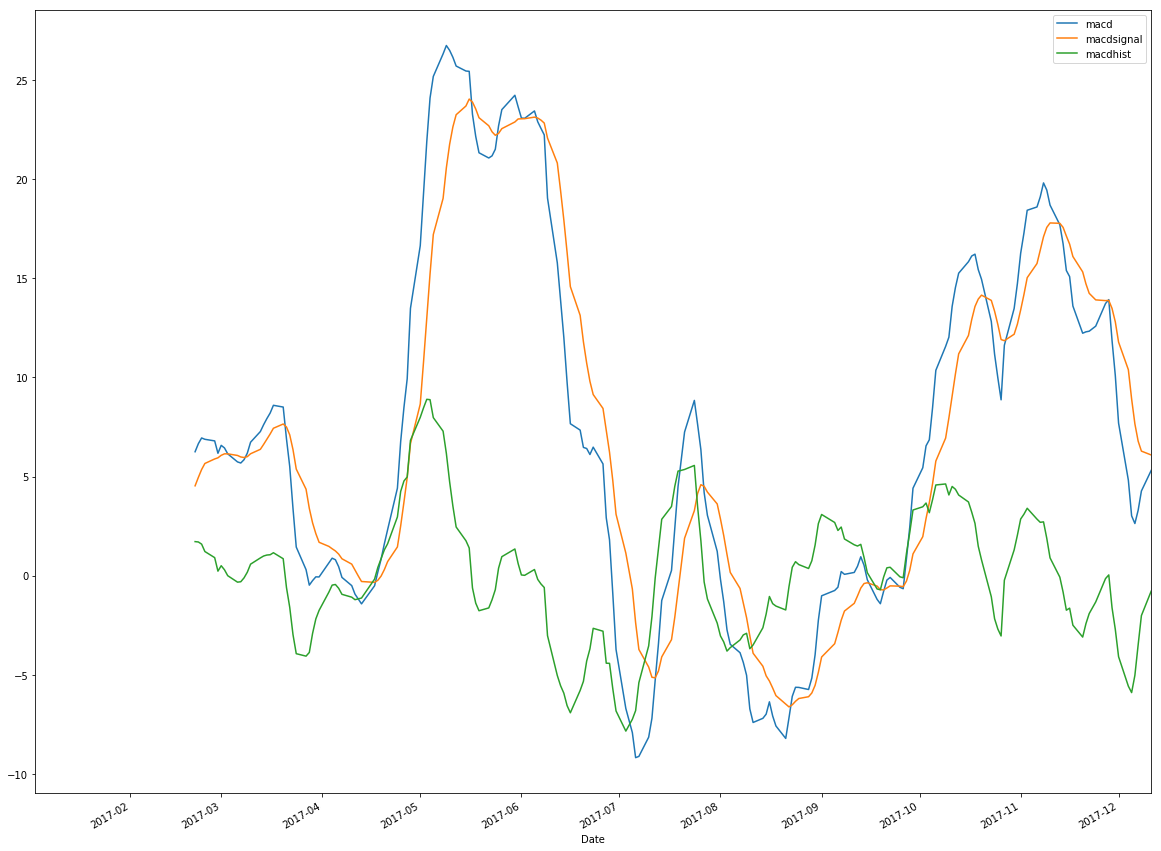

In [136]:
df[['macd', 'macdsignal', 'macdhist']].plot(legend='best', figsize=(20,16))

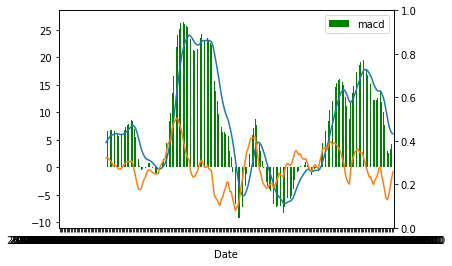

In [135]:
# 分別用直線圖與折線圖表示
pic.figure()

P1 = df[['macd']].plot(kind="bar",color='g');pic.xticks(rotation=0) #0為中

P2 = P1.twinx()
P1.plot(P1.get_xticks(),df[['macdsignal', 'macdhist']])

# Q5. 策略回測。
寫出自己的交易策略，並回測看看結果怎樣。

In [3]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [4]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [5]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [6]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [7]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [34]:
# 定義你的策略

def M064810009(df):
    
    SMA = talib.MA(df['Close'].values,30,matype=0)[-1]
    EMA = talib.MA(df['Close'].values,30,matype=1)[-1]
    WMA = talib.MA(df['Close'].values,30,matype=2)[-1]
    DEMA = talib.MA(df['Close'].values,30,matype=3)[-1]
    TEMA = talib.MA(df['Close'].values,30,matype=4)[-1]
    macd, macdsignal, macdhist = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['macdhist'] = macdhist
    
    has_position = False
    df['signals'] = 0
    
    # TODO
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['macd'][t-1] < df['macdsignal'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif  df['macd'][t-1] > df['macdsignal'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    # 填入你們的策略
   

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [35]:
def apply_strategy(strategy, df):
    return strategy(df)

In [36]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy,M064810009]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [43]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [38]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.513471,-0.238810,230,1.086109,705,17,TICC,M064810009
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [39]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [40]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
15,2.493265,-0.221228,182,2.652576,705,20,CDZI,M064810009
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [45]:
# 只看MACD
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [M064810009]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)
results_df

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.513471,-0.238810,230,1.086109,705,17,TICC,M064810009
1,2.050084,-0.243045,225,1.951831,705,19,TWIN,M064810009
2,0.843259,-0.207414,348,1.238963,705,16,AMOT,M064810009
3,2.493265,-0.221228,182,2.652576,705,20,CDZI,M064810009
4,1.230860,-0.088615,196,1.176443,705,21,GOOG,M064810009
5,0.649301,-0.140208,264,1.092828,705,15,TBNK,M064810009
6,2.424826,-0.119518,243,1.854544,705,15,RICK,M064810009
7,1.554981,-0.158436,260,1.296077,705,19,UTMD,M064810009
8,-1.981452,-0.374691,274,0.694881,350,6,YTRA,M064810009
9,-1.255560,-0.079914,127,0.964528,203,4,CSML,M064810009
